In [110]:
#CSV FORMAT
#0:Time of Measurement
#1: Weight(lb)
#2: BMI
#3: Body Fat(%)
#4: Fat-free Body Weight(lb)
#5: Subcutaneous Fat(%)
#6: Visceral Fat
#7: Body Water(%)
#8: Skeletal Muscle(%)
#9: Muscle Mass(lb)
#10:Bone Mass(lb)
#11:Protein(%)
#12:BMR(kcal)
#13:Metabolic Age
#14Remarks

#SCRAP
# plt.axis([0, max(days), 120.0, 135.0])
# plt.plot(days, weights)
# plt.title("Weight vs. Days since 1/15/21")
# plt.xlabel("Days since 1/15/21")
# plt.ylabel("Weight (lbs)")
# plt.show()

# plt.plot(days, weights)
# plt.xticks(np.arange(min(days),max(days),30))
# plt.yticks(np.arange(120.0, 135.0))
# plt.show()

# plt.ylim(120,130)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
# plt.xticks(rotation = 25)
# plt.yticks(rotation = .4)

# ax.plot_date(dates, weights, markersize = 4)
# plt.scatter(dates, weights)

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
import seaborn.objects as so
import matplotlib.ticker as ticker
import csv

In [133]:
full_dates = []
dates = []
weights = []
bmis = []
bfpercs = []
musclemasses = []
musclepercs = []

#Read in data
with open('data.csv', 'r') as file:
    entries = csv.reader(file, delimiter=',')
    for entry in entries:
        full_dates.append(entry[0])
        weights.append(float(entry[1]))
        bmis.append(float(entry[2]))
        bfpercs.append(float(entry[3]))
        musclemasses.append(float(entry[9]))

#Convert dates
start = dt.datetime(2021, 1, 15)
for i in full_dates:
    spl = i.split(",")
    date = spl[0]
    time = spl[1]
    dspl = date.split('/')
    tspl = time.split(':')
    curr = dt.datetime(int(dspl[2]), int(dspl[0]), int(dspl[1]), int(tspl[0]), int(tspl[1]), int(tspl[2]))
    dates.append(curr)

#Calculate muscle percentages
for i in range(len(dates)):
    musclepercs.append(round((float(musclemasses[i]) / float(weights[i])*100),1))

In [147]:
def plot_data(dates, data, name): 
    fig, ax = plt.subplots()
    ax.set_xlim([dt.date(2021,1,15),dt.date.today()])
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, (end-start)/12))
    fig.autofmt_xdate()
    ax.set_ylim([min(data),max(data)])
    plt.plot(dates, data, color='red', marker='o', markersize=4)
    plt.title(name + " vs. Days since 1/15/21")
    plt.xlabel("Date")
    plt.ylabel(name)
    plt.show()

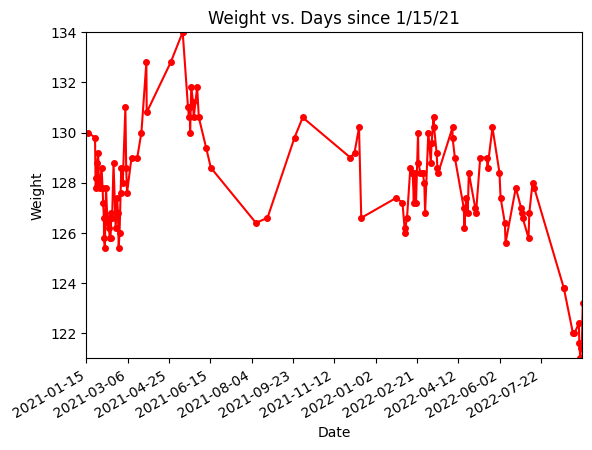

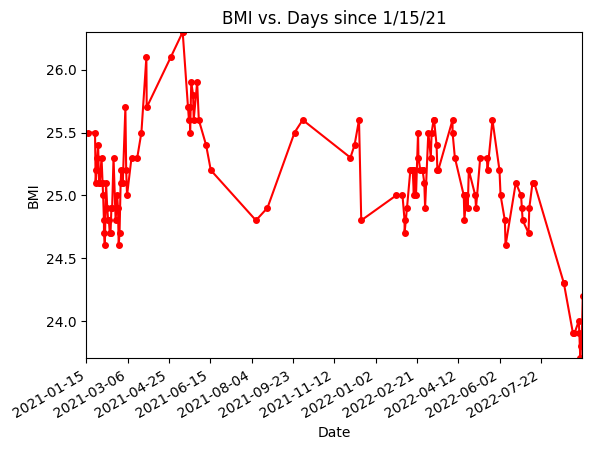

In [149]:
plot_data(dates, weights, "Weight")
plot_data(dates, bmis, "BMI")